In [3]:
!pip3 install -U ucimlrepo 
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install imblearn
!pip install import-ipynb

import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import timeit

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
from ucimlrepo import fetch_ucirepo

#Loads the Heart Disease dataset
heart_disease = fetch_ucirepo(id=45)

#X contains the independent variables and y contains the dependent variables
X = heart_disease.data.features
y = heart_disease.data.targets

#Create a DataFrame with the features
df = pd.DataFrame(X)

#Add the target variable to the DataFrame
df['target'] = y

#Display the first few rows of the DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       2  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import Binarizer

#Data Preprocessing 
#Handle missing values if any
df = df.dropna()

#Flatten target into 0/1
binarizer = Binarizer(threshold=0)
df['target'] = binarizer.fit_transform(df[['target']])
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target  
0  0.0   6.0       0  
1  3.0   3.0       1  
2  2.0   7.0       1  
3  0.0   3.0       0  
4  0.0   3.0       0  


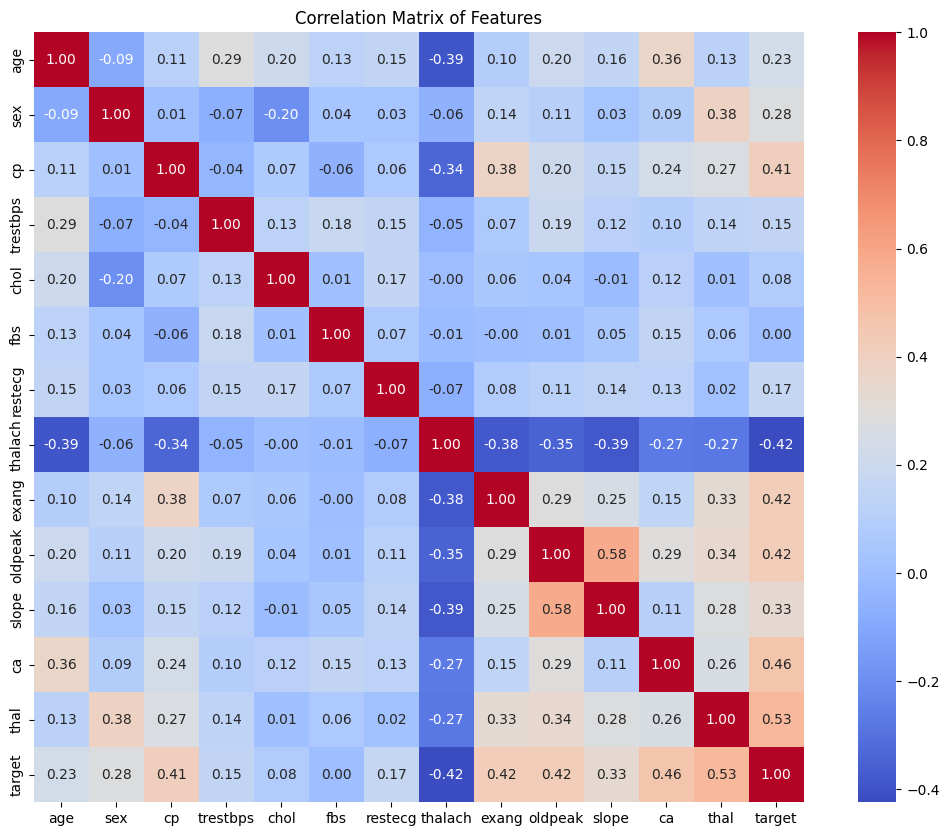

In [6]:
#Computes the correlation matrix
correlation_matrix = df.corr()

#Plots the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# In this section, investigate some features that are more highly correlated with target
def chart_breakdown_for_feature(feature_name, x_ticks, x_labels):
    crosstab = pd.crosstab(df[feature_name], df['target'], margins=True)
    crosstab_plot = crosstab.iloc[:-1, :-1].plot(kind='bar', stacked=True)
    plt.title(f'{feature_name} vs Heart Disease')
    plt.xlabel(feature_name)
    plt.ylabel('Count')
    plt.legend(labels=['No Heart Disease', 'Heart Disease'])
    plt.xticks(rotation=0, ticks=x_ticks, labels=x_labels)
    plt.tight_layout()



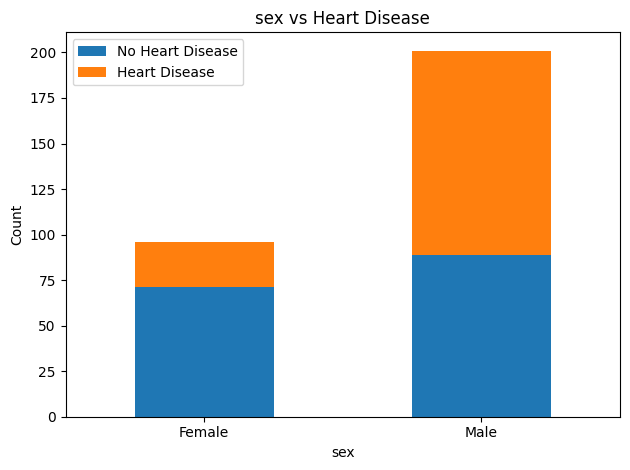

In [10]:
# 0=female, 1=male
chart_breakdown_for_feature('sex', x_ticks=[0, 1], x_labels=['Female', 'Male'])

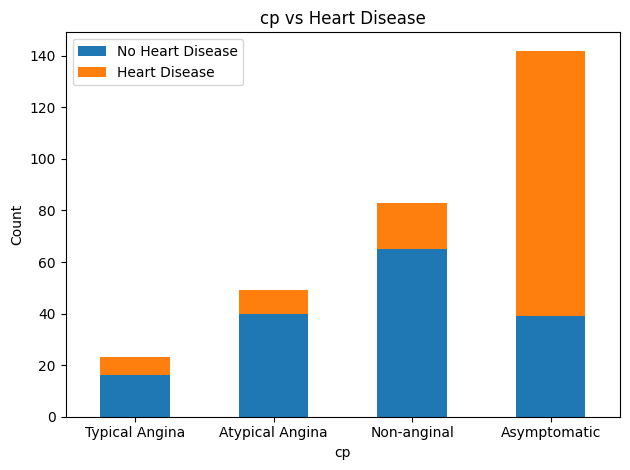

In [12]:
# Chest pain type
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic

chart_breakdown_for_feature('cp', x_ticks=[0,1,2,3], x_labels=['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'])

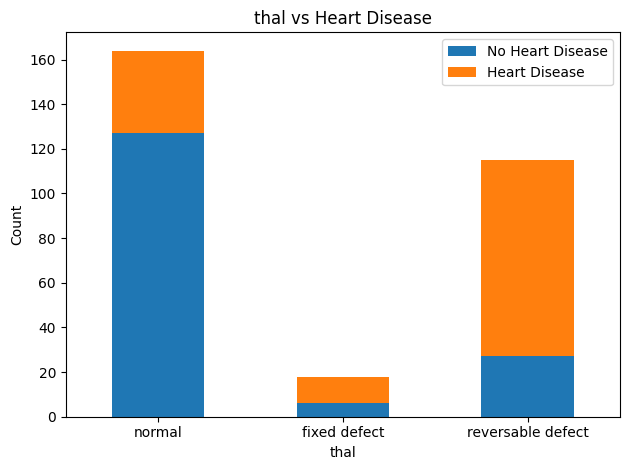

In [13]:
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
chart_breakdown_for_feature('thal', x_ticks=[0,1,2], x_labels=['normal','fixed defect', 'reversable defect'])

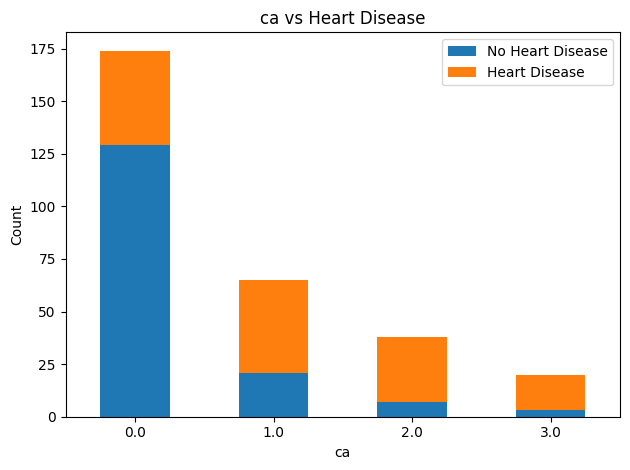

In [66]:
# ca: number of major vessels (0-3) colored by flourosopy
chart_breakdown_for_feature('ca')